In [1]:
from tqdm import tqdm

import bt #bt : 데이터 수집, 전략 정의, 전략 백테스트, 결과 평가 4가지 과정을 위한 라이브러리
import ffn #ffn : 퀀트 모델 적용 결과 기술통계 분석 라이브러리

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plt.rcParams['font.family'] ='NanumBarunGothic' 
plt.rcParams['axes.unicode_minus'] =False

In [3]:
#예상 수익률
pred_returns = pd.read_csv("예상_수익률.csv")
pred_returns['Date'] = pd.to_datetime(pred_returns['Date'])
pred_returns.set_index('Date', inplace=True)
pred_returns = pred_returns.astype(float)
print(pred_returns)

              타이거로우볼    타이거모멘텀   타이거우량가치  타이거코스피인버스  코덱스코스피중소형주     코덱스밸류  \
Date                                                                        
2016-07-13 -0.020089 -0.015202  0.001541  -0.007433   -0.014577 -0.011416   
2016-07-14 -0.007949 -0.021910  0.002299  -0.008585   -0.015390 -0.011951   
2016-07-15 -0.005803 -0.021981  0.002209  -0.005030   -0.015327 -0.005889   
2016-07-18 -0.008656 -0.023460 -0.000577  -0.006340   -0.014491 -0.006744   
2016-07-19 -0.012800 -0.023240  0.000098  -0.004966   -0.013653 -0.010860   
...              ...       ...       ...        ...         ...       ...   
2024-01-08  0.042782 -0.051681  0.014575   0.036510    0.034733  0.043896   
2024-01-09  0.037635 -0.037008  0.015007   0.028619    0.024861  0.049622   
2024-01-10  0.012259 -0.024017  0.008685   0.005971    0.011112  0.027453   
2024-01-11 -0.005955 -0.015470 -0.005883  -0.005339   -0.002694  0.002932   
2024-01-12 -0.005604 -0.012594 -0.011310  -0.007636   -0.004088  0.002833   

In [4]:
etf_price = pd.read_csv("etf_price_filtered.csv")
etf_price['Date'] = pd.to_datetime(etf_price['Date'])
etf_price.set_index('Date', inplace = True)
etf_price

,타이거로우볼,타이거모멘텀,타이거우량가치,타이거코스피인버스,코덱스코스피중소형주,코덱스밸류,코덱스퀄리티,코덱스배당성장,타이거고배당
Date,,,,,,,,,
2016-07-13,9798.0,8565.0,18066.0,8864.0,10335.0,8304.0,9003.0,10785.0,8546.0
2016-07-14,9793.0,8545.0,18045.0,8864.0,10215.0,8276.0,8989.0,10815.0,8556.0
2016-07-15,9853.0,8510.0,17913.0,8846.0,10215.0,8333.0,8985.0,10870.0,8576.0
2016-07-18,9821.0,8480.0,17795.0,8859.0,10205.0,8316.0,8972.0,10890.0,8599.0
2016-07-19,9746.0,8500.0,17744.0,8818.0,10133.0,8307.0,8980.0,10815.0,8579.0
...,...,...,...,...,...,...,...,...,...
2024-01-08,11500.0,4955.0,24085.0,10940.0,11910.0,8555.0,8575.0,13675.0,13510.0
2024-01-09,11495.0,4980.0,24165.0,11030.0,12020.0,8560.0,8575.0,13675.0,13550.0
2024-01-10,11465.0,5030.0,24060.0,11030.0,12030.0,8555.0,8585.0,13640.0,13470.0


In [5]:
# 0인값에 3% 가중치 설정
for i in range(0,pred_returns.shape[0]):
    for j in range(0, 9):
        if pred_returns.iloc[i,j] <= 0:
            pred_returns.iloc[i,j] = 0.03

weights = pred_returns

#가중치 열 이름과 가격데이터 열이름 같게 만듬
weights.columns =['타이거로우볼','타이거코스피인버스','타이거모멘텀','타이거우량가치','코덱스코스피중소형주',
                     '코덱스밸류','코덱스퀄리티','코덱스배당성장','타이거고배당']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


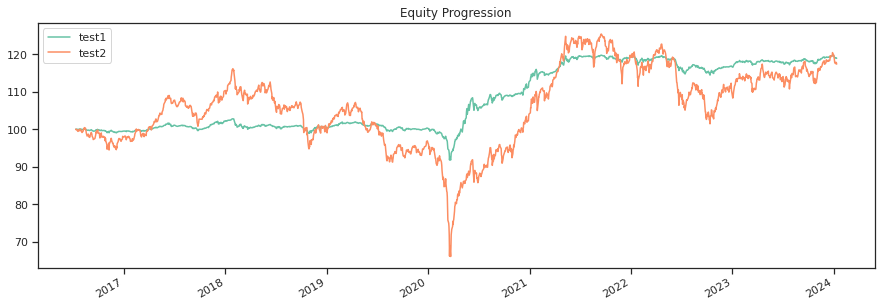

In [6]:
algos1 = [
    bt.algos.RunMonthly(), #매월 말 리밸런싱
    bt.algos.SelectAll(), #설정된 유니버스 모두 선택
    bt.algos.WeighTarget(weights), #weight대로 가중치 부여
    bt.algos.Rebalance() #리밸런싱 진행
]

algos2 = [
    bt.algos.RunMonthly(), #매월 말 리밸런싱
    bt.algos.SelectAll(), #설정된 유니버스 모두 선택
    bt.algos.WeighEqually(),
    bt.algos.Rebalance() #리밸런싱 진행
]

test1 = bt.Strategy(name = 'test1', algos = algos1)
test2 = bt.Strategy(name = 'test2', algos = algos2)
base1 = bt.Backtest(strategy = test1, data = etf_price)
base2 = bt.Backtest(strategy = test2, data = etf_price)
res = bt.run(base1, base2) 
res.plot()
plt.show()

In [7]:
res.display()

Stat                 test1       test2
-------------------  ----------  ----------
Start                2016-07-12  2016-07-12
End                  2024-01-12  2024-01-12
Risk-free rate       0.00%       0.00%

Total Return         18.89%      17.34%
Daily Sharpe         0.69        0.25
Daily Sortino        1.07        0.37
CAGR                 2.33%       2.15%
Max Drawdown         -10.70%     -43.10%
Calmar Ratio         0.22        0.05

MTD                  -0.69%      -2.56%
3m                   0.52%       1.68%
6m                   0.98%       3.55%
YTD                  -0.69%      -2.56%
1Y                   1.14%       4.71%
3Y (ann.)            1.39%       3.16%
5Y (ann.)            3.40%       3.00%
10Y (ann.)           -           -
Since Incep. (ann.)  2.33%       2.15%

Daily Sharpe         0.69        0.25
Daily Sortino        1.07        0.37
Daily Mean (ann.)    2.49%       2.96%
Daily Vol (ann.)     3.63%       11.95%
Daily Skew           0.04        -1.01
Daily Kurt